In [1]:
import pickle
import datetime as dt
import pandas as pd
import numpy as np
import os
import json

from util import create_df_benchmark
import StrategyLearner

import marketsim
import importlib
importlib.reload(marketsim)
from marketsim import compute_portvals_single_symbol, market_simulator
from analysis import get_portfolio_value, get_portfolio_stats, plot_normalized_data

In [2]:
path = "../Data/sp500.csv"
sp500 = pd.read_csv(path)
sp500.drop(['Unnamed: 0'], axis=1, inplace=True)
sp500.head()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub-Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M,reports,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1976-08-09,66740,1902
1,AOS,A. O. Smith,reports,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,1800,1888
3,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ABMD,Abiomed,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,815094,1981


In [3]:
sectors = sp500['GICS Sector'].unique()
sectors

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Staples',
       'Consumer Discretionary', 'Utilities', 'Financials', 'Materials',
       'Real Estate', 'Energy'], dtype=object)

In [4]:
HealthCare = sp500[sp500['GICS Sector'] == 'Health Care'].Symbol.tolist()
Financials = sp500[sp500['GICS Sector'] == 'Financials'].Symbol.tolist()
InfoTech = sp500[sp500['GICS Sector'] == 'Information Technology'].Symbol.tolist()
ConsumerStaples = sp500[sp500['GICS Sector'] == 'Consumer Staples'].Symbol.tolist()

In [5]:
from indicators import get_momentum, get_sma_indicator, compute_bollinger_value
from util import  get_feature_file

# datafull = pd.DataFrame()

symbols = os.listdir("../Data/financials")
for _ in symbols:
    symbol = _.split(".")[0]
    # Get adjusted close prices for symbol
    try:
        df_features = pd.read_csv("../Data/financials/"+_, index_col='Datetime',
        parse_dates=True, na_values=['nan'])
    except:
        print('cannot read', _)
        continue
    if len(df_features) < 1:
        print(_)
        continue
    df = pd.read_csv("../Data/"+_, index_col='Datetime',
        parse_dates=True, na_values=['nan'])

    start = df_features.index.min()
    end = df_features.index.max()
    prices = df[(df.index >= start) & (df.index <= end)].Close
    returns = df[(df.index >= start) & (df.index <= end)].Returns

    # drop column deltaCSO
    # df_features.drop(['deltaCSO'], axis=1, inplace=True)

    # window = 10
    # # Compute rolling mean
    # rolling_mean = prices.rolling(window=window, min_periods=1).mean()
    # # Compute_rolling_std
    # rolling_std = prices.rolling(window=window, min_periods=1).std()
    # # Compute momentum
    # df_features['momentum'] = get_momentum(prices, window)
    # # Compute SMA indicator
    # df_features['sma_indicator'] = get_sma_indicator(prices, rolling_mean)
    # # Compute Bollinger value
    # df_features['bollinger_val'] = compute_bollinger_value(prices, rolling_mean, rolling_std)

    df_features['Close'] = prices
    df_features['Returns'] = returns
    # df_features.index.name = 'Datetime'
    # df_features['Symbol'] = symbol

    df_features.to_csv("../Data/financials/"+_, index=True)

    # break

# df_features.head(10)
# datafull.reset_index(inplace=True)

OGN.csv
WTW.csv


In [6]:
df_features = pd.read_csv("../Data/financials/"+"ABC.csv", index_col='Datetime',
        parse_dates=True, na_values=['nan'])
df_features.isnull().sum()

RDSkew                     0
down_vol_ratio             0
late_trans_ratio           1
vol_price_corr             0
avg_trans_outflow_ratio    0
large_order_drives_gain    0
DR                         0
ROE                        0
PM                         0
deltaR                     0
deltaNT                    0
PR                         0
deltaCFO                   0
Close                      0
Returns                    1
Symbol                     0
dtype: int64

In [7]:
df_all = {}
for fname in os.listdir("../Data/financials"):
    name = fname.split('.')[0]
    df = pd.read_csv(os.path.join("../Data/financials", fname), index_col='Datetime', parse_dates=True)
    df_all[name] = df

df_all = pd.concat(df_all.values(), axis=0, keys=df_all.keys())
df_all.index.names = ("Symbol", "Datetime")

In [5]:
# remove erorrs
Financials.remove('BRK.B') 
ConsumerStaples.remove('BF.B')
ConsumerStaples.remove("COST")

In [17]:
HealthCare_df = df_all.loc[HealthCare].groupby(level=1).mean()
Financials_df = df_all.loc[Financials].groupby(level=1).mean()
InfoTech_df = df_all.loc[InfoTech].groupby(level=1).mean()
ConsumerStaples_df = df_all.loc[ConsumerStaples].groupby(level=1).mean()

HealthCare_df.to_csv("../Data/HealthCare.csv", index=True)
Financials_df.to_csv("../Data/Financials.csv", index=True)
InfoTech_df.to_csv("../Data/InfoTech.csv", index=True)
ConsumerStaples_df.to_csv("../Data/ConsumerStaples.csv", index=True)

HealthCare_df = pd.read_csv("../Data/HealthCare.csv", index_col='Datetime',
    parse_dates=True, na_values=['nan'])
Financials_df = pd.read_csv("../Data/Financials.csv", index_col='Datetime',
    parse_dates=True, na_values=['nan'])      
InfoTech_df = pd.read_csv("../Data/InfoTech.csv", index_col='Datetime',
    parse_dates=True, na_values=['nan'])
ConsumerStaples_df = pd.read_csv("../Data/ConsumerStaples.csv", index_col='Datetime',
    parse_dates=True, na_values=['nan'])

HealthCare_df.drop(['Close', 'Returns'], axis=1, inplace=True)
Financials_df.drop(['Close', 'Returns'], axis=1, inplace=True)
InfoTech.drop(['Close', 'Returns'], axis=1, inplace=True)
ConsumerStaples_df.drop(['Close', 'Returns'], axis=1, inplace=True)

HealthCare_df.to_csv("../Data/HealthCare.csv", index=True)
Financials_df.to_csv("../Data/Financials.csv", index=True)
InfoTech_df.to_csv("../Data/InfoTech.csv", index=True)
ConsumerStaples_df.to_csv("../Data/ConsumerStaples.csv", index=True)

In [6]:
symbol_dict = {}

for symbol in HealthCare:
    symbol_dict[symbol] = 'HealthCare'

for symbol in Financials:
    symbol_dict[symbol] = 'Financials'

for symbol in InfoTech:
    symbol_dict[symbol] = 'InfoTech'

for symbol in ConsumerStaples:
    symbol_dict[symbol] = 'ConsumerStaples'

In [7]:
symbol_dict['PBCT'] = 'Financials'

In [14]:
# store symbol_dict in txt file
with open('../Data/symbol_dict.txt', 'w') as f:
    json.dump(symbol_dict, f)

In [15]:
classical = ['alpha1','alpha3','alpha4','alpha5','alpha6','alpha7','alpha8','alpha9','alpha10','alpha11','momentum','sma_indicator','bollinger_val']
technicals = ['RDSkew','down_vol_ratio','late_trans_ratio','vol_price_corr','avg_trans_outflow_ratio','large_order_drives_gain']
fundamentals = ['DR','ROE','PM','deltaR','deltaNT','PR','deltaCFO']

In [16]:
def test_analysis(stl, symbol, start_date, end_date, start_val, commission, fig_name=None, impact=0, verbose=True):
    df_trades, prices = stl.test_policy(symbol=symbol, start_date=start_date, end_date=end_date)

    df_benchmark_trades = pd.Series(np.zeros(len(prices)), index=prices.index)
    df_benchmark_trades.iloc[0] = num_shares
    df_benchmark_trades.iloc[-1] = -num_shares

    # Retrieve performance stats via a market simulator
    if verbose:
        print ("Performances during training period for {}".format(symbol))
        print ("Date Range: {} to {}".format(start_date, end_date))
    
    return market_simulator(symbol, df_trades, df_benchmark_trades, prices=prices.copy(), 
        start_val=start_val, commission=commission, impact=impact, fig_name=fig_name, verbose=verbose)

# StrategyLearner1(3)

In [67]:
start_val = 10000
symbol = "JPM"
commission = 0.00
impact = 0.0
num_shares = 100

start_date_train = dt.datetime(2021, 1, 1)
end_date_train = dt.datetime(2021, 10, 1)

start_date_test = dt.datetime(2021, 1, 1)
end_date_test = dt.datetime(2022, 3, 1)

In [70]:
import StrategyLearner
importlib.reload(StrategyLearner)
from StrategyLearner import StrategyLearner

/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


1 -1.1149229601360102
2 1.053797879315669
3 -0.6144138790937314
4 1.4477658242071887
5 0.1497101807564082
6 0.4074082555487467
7 1.7768027547059917
8 1.2284958695071406
9 0.31681546416779094
10 1.6655840281231724
11 1.544355325337494
12 1.7728386324586465
13 2.2128248255589384
14 2.508646548709875
15 2.131875860326097
16 2.251515663782047
17 1.4925472573565777
18 2.492473114716865
19 2.0457489231863977
20 1.9901171066510381
21 2.434070649136722
22 1.7276335905942282
23 3.4576675933925975
24 1.51253302466393
25 1.8086696818527608
26 3.2550304512310255
27 4.129326912625759
28 4.001834719965189
29 2.3950616003887384
30 1.9667663678353422
31 2.6395809098082
32 1.7712973254722773
33 3.6326914620306314
34 3.082644763549056
35 2.3097090615764655
36 3.000631064676711
37 2.866744060284065
38 2.068480552141395
39 2.550766137995424
40 2.4717320593673127
41 2.871954877699715
42 3.4383679561313585
43 2.834267507336284
44 3.1083111329277604
45 2.4122611201231634
46 2.482906509518666
47 3.78385697711

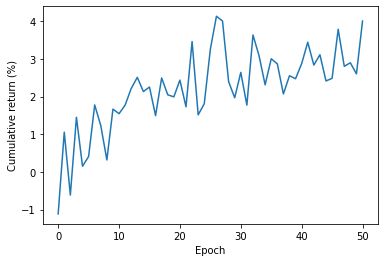

In [73]:
stl = StrategyLearner(num_shares=num_shares, impact=impact, 
                      commission=commission, verbose=True, num_actions=3)
stl.add_evidence(start_val=start_val, start_date=start_date_train, end_date=end_date_train)

In [74]:
with open('stl_1_02_51.pkl', 'wb') as output:
    pickle.dump(stl, output)

Performances during training period for ABBV
Date Range: 2021-06-01 00:00:00 to 2021-09-30 00:00:00
Sharpe Ratio of Portfolio: 1.7325
Sharpe Ratio of Benchmark : -0.5404

Cumulative Return of Portfolio: 63.47%
Cumulative Return of Benchmark : -4.63%

Standard Deviation of Portfolio: 0.0707
Standard Deviation of Benchmark : 0.0136

Average Daily Return of Portfolio: 0.772
Average Daily Return of Benchmark : -0.0463

Final Portfolio Value: 16347
Final Benchmark Value: 9515


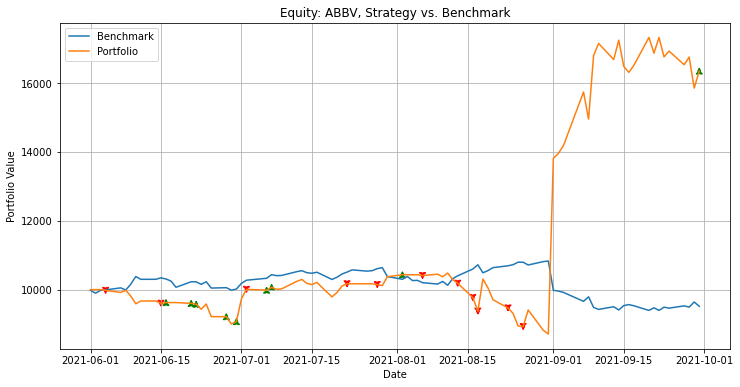

(1.7324742897232988,
 -0.5403683462034741,
 0.634708170900002,
 -0.04626003671346712,
 0.07074176280368646,
 0.01361212335059752,
 0.00772044628398175,
 -0.00046335676325781616,
 16347.08170900002,
 9515.995800800001)

In [75]:
"""in-sample performance"""
start_date = dt.datetime(2021, 6, 1)
end_date = dt.datetime(2021, 9, 30)
commission = 0.002
symbol = 'ABBV'  #HealthCare
fig_name = "../Figure/{}_S3_in.png".format(symbol)

test_analysis(stl, symbol, start_date, end_date, start_val, commission, fig_name=fig_name)

Performances during training period for CME
Date Range: 2021-10-01 00:00:00 to 2021-12-30 00:00:00
Sharpe Ratio of Portfolio: -1.9968
Sharpe Ratio of Benchmark : 3.5828

Cumulative Return of Portfolio: -85.45%
Cumulative Return of Benchmark : 31.81%

Standard Deviation of Portfolio: 1.5919
Standard Deviation of Benchmark : 0.0207

Average Daily Return of Portfolio: -20.0243
Average Daily Return of Benchmark : 0.4675

Final Portfolio Value: 1449
Final Benchmark Value: 13128


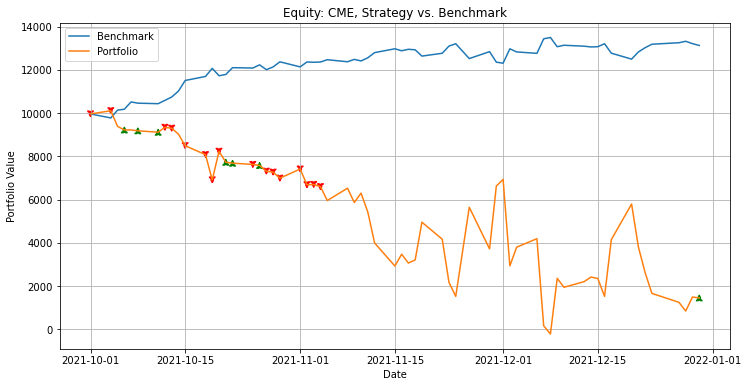

(-1.9968314758157217,
 3.5828359722958223,
 -0.8545055524579815,
 0.3180765488927819,
 1.5919002920026373,
 0.020712732973147727,
 -0.2002428444513709,
 0.004674811049600054,
 1449.225088600011,
 13128.951899)

In [77]:
"""out-sample performance"""
start_date = dt.datetime(2021, 10, 1)
end_date = dt.datetime(2021, 12, 30)
commission = 0.002
symbol = "CME"
fig_name = "../Figure/CME_S3_out.png"

test_analysis(stl, symbol, start_date, end_date, start_val, commission, fig_name=fig_name)

# StrategyLearner2

/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


1 -0.3446463610350764
2 0.012017805513517901
3 0.3775722398241921
4 0.2704885576482779
5 -0.5256300661334049
6 0.46705599113844326
7 0.030351826012564073
8 -0.5211939652262222
9 -0.21446651319038712
10 0.6744201172354299
11 0.21006875313362808
12 0.037066434963518746
13 0.4213579610011616
14 -0.4429731989868321
15 0.23276706773214176
16 -0.8284239331796047
17 0.4453334657062915
18 0.5146977176382634
19 0.9958508891351245
20 0.08569713674065052
21 0.14577492636411174
22 -0.17404335022156608
23 0.5762493333860752
24 0.07266049862183377
25 0.22469961418014908
26 0.43533693397842255
27 0.7358572251381919
28 0.5535374888229426
29 -0.1115227227819058
30 0.4517831363789168
31 -0.05275919704115109
32 -0.4252845631746981
33 -0.7426317443313369
34 -0.1919204545338576
35 1.1758568916352306
36 0.42407398736032603
37 -0.00026277569801881617
38 0.9110308141816043
39 0.25978699007080513
40 0.697322852056136
41 0.08280929943530113
42 0.062194312675300095
43 0.05616211272178926
44 0.5577791862947875
45

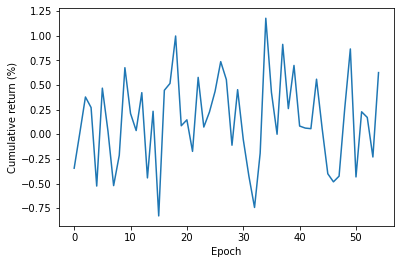

In [189]:
# without fundamental 
import StrategyLearner2
importlib.reload(StrategyLearner2)
from  StrategyLearner2 import StrategyLearner2

start_val = 10000
symbol = "JPM"
commission = 0.002
impact = 0.0
num_shares = 100

start_date_train = dt.datetime(2021, 1, 1)
end_date_train = dt.datetime(2021, 10, 1)

start_date_test = dt.datetime(2021, 1, 1)
end_date_test = dt.datetime(2022, 3, 1)


stl2 = StrategyLearner2(num_shares=num_shares, verbose=True, num_actions=3)
stl2.add_evidence(start_val=start_val, start_date=start_date_train, end_date=end_date_train)

In [192]:
with open('stl_2_01_55.pkl', 'wb') as output:
    pickle.dump(stl2, output)

Performances during training period for CME
Date Range: 2021-07-01 00:00:00 to 2021-09-30 00:00:00
Sharpe Ratio of Portfolio: 0.4168
Sharpe Ratio of Benchmark : -2.2436

Cumulative Return of Portfolio: -35.63%
Cumulative Return of Benchmark : -21.29%

Standard Deviation of Portfolio: 0.1725
Standard Deviation of Benchmark : 0.0247

Average Daily Return of Portfolio: 0.453
Average Daily Return of Benchmark : -0.349

Final Portfolio Value: 6436
Final Benchmark Value: 7837


/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


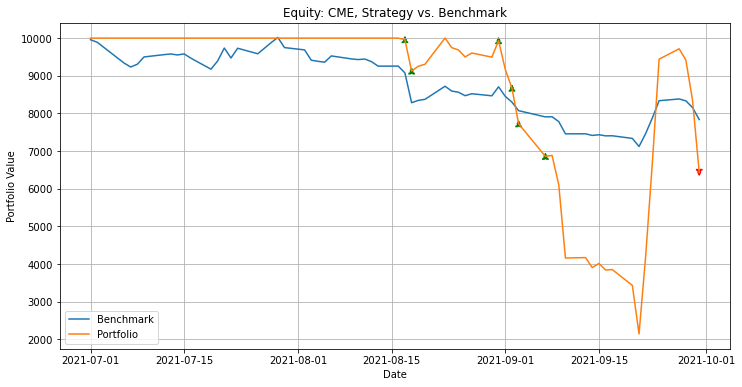

In [239]:
start_date = dt.datetime(2021, 7, 1)
end_date = dt.datetime(2021, 9, 30)
commission = 0.002
symbol = Financials[20]
fig_name = "../Figure/CME_S1_in.png"

test_analysis(stl2, symbol, start_date, end_date, start_val, commission, fig_name=fig_name)


# StrategyLearner3

/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


1 -0.8584882549259746
2 -0.27376676066133854
3 0.6271669246853296
4 0.42900773280921345
5 1.3909759591921291
6 0.6421678770617835
7 0.4261233842431495
8 1.0202626584703582
9 2.0344669215289293
10 1.2791360729060905
11 1.5129829108453743
12 2.6960465851392774
13 2.3772808731477664
14 1.7273723082519894
15 1.7250401853546293
16 1.6807775557286462
17 2.3137157852395136
18 2.4892709202243672
19 1.4246693412995588
20 3.954681111193896
21 2.255565846913558
22 2.5360052738083456
23 1.0633541714467876
24 2.720710631911519
25 2.3754536201445746
26 2.065779344163108
27 2.827530590374821
28 1.7505504238190404
29 2.1895995672855544
30 2.795020256828114
31 1.9613137573406025
32 3.5881703847573916
33 3.566842692047766
34 2.763531553316897
35 2.7345123709381087
36 2.4051868654046773
37 2.9183795749180734
38 3.0100468591821956
39 3.375878486878188
40 1.9737822200882393
41 3.2554607685069947
42 2.627609282269716
43 2.163278817090149
44 2.7280906231956052
45 3.482524584418021
46 2.396489354926962
47 3.2

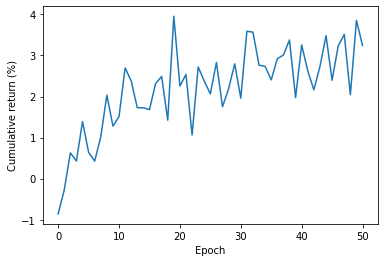

In [218]:
# plus 7 classical features

import StrategyLearner3
importlib.reload(StrategyLearner3)
from  StrategyLearner3 import StrategyLearner3

start_val = 10000
symbol = "JPM"
commission = 0.002
impact = 0.0
num_shares = 100

start_date_train = dt.datetime(2021, 1, 1)
end_date_train = dt.datetime(2021, 10, 1)

start_date_test = dt.datetime(2021, 1, 1)
end_date_test = dt.datetime(2022, 3, 1)


stl3 = StrategyLearner4(feature_list=technicals, num_shares=num_shares, verbose=True, num_actions=3)
stl3.add_evidence(start_val=start_val, start_date=start_date_train, end_date=end_date_train)

In [220]:
with open('stl_3_01_51.pkl', 'wb') as output:
    pickle.dump(stl3, output)

Performances during training period for CME
Date Range: 2021-07-01 00:00:00 to 2021-09-30 00:00:00
Sharpe Ratio of Portfolio: 2.9693
Sharpe Ratio of Benchmark : -2.2436

Cumulative Return of Portfolio: 94.73%
Cumulative Return of Benchmark : -21.29%

Standard Deviation of Portfolio: 0.068
Standard Deviation of Benchmark : 0.0247

Average Daily Return of Portfolio: 1.2725
Average Daily Return of Benchmark : -0.349

Final Portfolio Value: 19472
Final Benchmark Value: 7837


/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


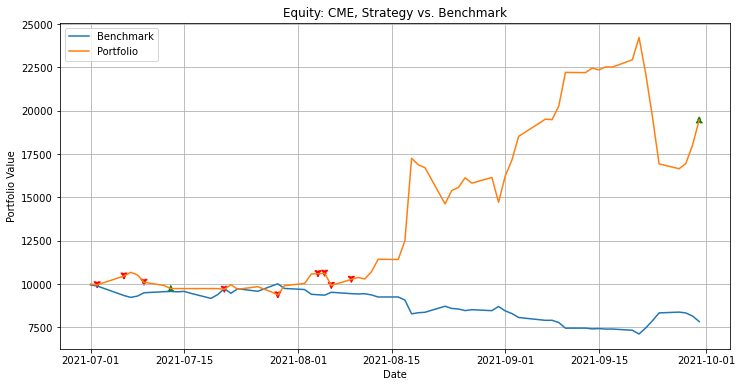

In [240]:
start_date = dt.datetime(2021, 7, 1)
end_date = dt.datetime(2021, 9, 30)
commission = 0.002
symbol = Financials[20]
fig_name = "../Figure/CME_S2_in.png"

test_analysis(stl3, symbol, start_date, end_date, start_val, commission, fig_name=fig_name)

Performances during training period for CME
Date Range: 2021-10-01 00:00:00 to 2021-12-31 00:00:00
Sharpe Ratio of Portfolio: 1.7745
Sharpe Ratio of Benchmark : 3.5311

Cumulative Return of Portfolio: -76.56%
Cumulative Return of Benchmark : 31.58%

Standard Deviation of Portfolio: 0.6994
Standard Deviation of Benchmark : 0.0206

Average Daily Return of Portfolio: 7.8185
Average Daily Return of Benchmark : 0.4573

Final Portfolio Value: 2343
Final Benchmark Value: 13105


/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


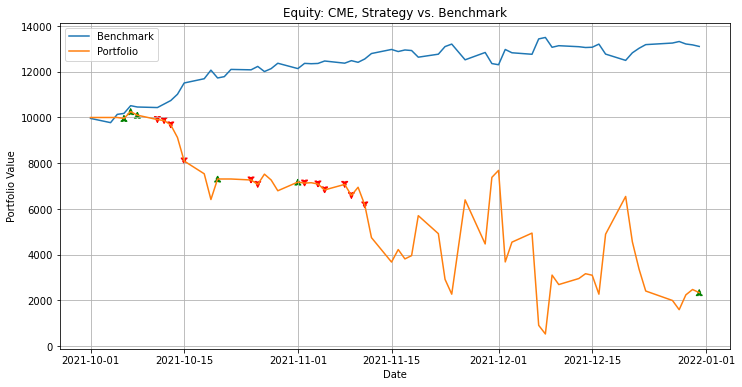

In [241]:
start_date = dt.datetime(2021, 10, 1)
end_date = dt.datetime(2021, 12, 31)
commission = 0.002
symbol = Financials[20]
fig_name = "../Figure/CME_S2_out.png"

test_analysis(stl3, symbol, start_date, end_date, start_val, commission, fig_name=fig_name)


# StrategyLearner4

In [106]:
import StrategyLearner4
importlib.reload(StrategyLearner4)
from StrategyLearner4 import StrategyLearner4

In [107]:
# new 0/1 patterning method
# breakthrough 5-day average = 1, otherwise 0
start_val = 10000
symbol = "JPM"
commission = 0.002
impact = 0.0
num_shares = 100

start_date_train = dt.datetime(2021, 1, 1)
end_date_train = dt.datetime(2021, 10, 1)

start_date_test = dt.datetime(2021, 1, 1)
end_date_test = dt.datetime(2022, 3, 1)

1 -0.7602913615883213
2 -0.5286846334529854
3 -0.5250885139624064
4 0.01920473209957131
5 1.679886312128965
6 1.533664096535042
7 1.8562398877865303
8 1.6865683156358864
9 1.2479915082518598
10 1.5300104873898528
11 0.6798156371256172
12 1.7240873012098563
13 1.6072051074848541
14 2.0542601999085206
15 1.1795057911843791
16 1.6071534088024262
17 2.397863928054164
18 2.3891758618386127
19 2.8894456848599015
20 2.5124108973362484
21 2.291898022421168
22 2.135724414169969
23 2.2242149120795642
24 2.602589503442189
25 2.4072555747192355
26 2.4056635943277347
27 2.077768541084991
28 2.1883998690566964
29 1.4954976640287703
30 2.8556242829842806
31 2.0244973337260204
32 2.9752800084401945
33 2.7495434297175096
34 2.22786966647199
35 2.6898509123916616
36 3.0958452183084715
37 3.1644656199173284
38 2.3001534758768827
39 3.684920777235775
40 3.1782144874317027
41 2.5128228272871116
42 2.6130747821908944
43 3.0246157856221005
44 1.9874619595977312
45 3.037241659493789
46 3.4492360375563935
47 3

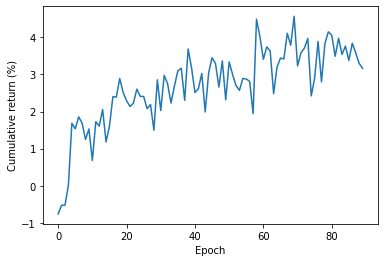

In [108]:
stl4 = StrategyLearner4(feature_list=technicals, num_shares=num_shares, verbose=True, num_actions=3)
stl4.add_evidence(start_val=start_val, start_date=start_date_train, end_date=end_date_train)

In [25]:
with open('stl_4_01_65.pkl', 'wb') as output:
    pickle.dump(stl4, output)

In [23]:
with open("stl_4_02_95.pkl", "rb") as input_file:
    stl_t = pickle.load(input_file)

In [19]:
start_date = dt.datetime(2021, 7, 1)
end_date = dt.datetime(2021, 9, 30)
commission = 0.002
# KO, KHC, BLK, PFE, AAPL, IBM
symbol = "AAPL"
fig_name = f"../Figure/{symbol}_S4_in.png"

test_analysis(stl4, symbol, start_date, end_date, start_val, commission, fig_name=fig_name);

NameError: name 'test_analysis' is not defined

Performances during training period for CME
Date Range: 2021-10-01 00:00:00 to 2021-12-30 00:00:00
Sharpe Ratio of Portfolio: -4.2235
Sharpe Ratio of Benchmark : 3.5828

Cumulative Return of Portfolio: -65.8%
Cumulative Return of Benchmark : 31.81%

Standard Deviation of Portfolio: 0.0579
Standard Deviation of Benchmark : 0.0207

Average Daily Return of Portfolio: -1.5392
Average Daily Return of Benchmark : 0.4675

Final Portfolio Value: 3419
Final Benchmark Value: 13128


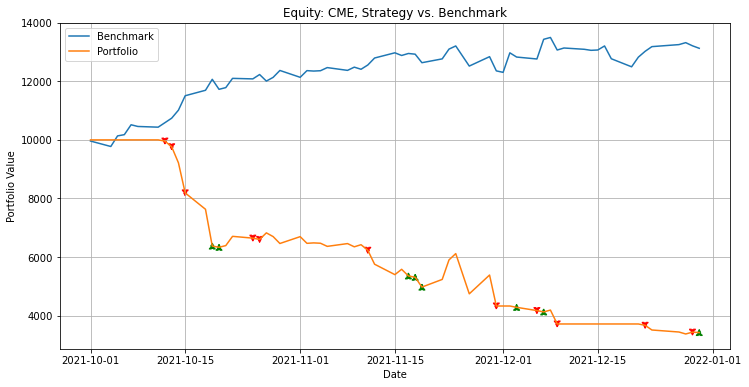

(-4.223474357657293,
 3.5828359722958223,
 -0.658036900599998,
 0.3180765488927819,
 0.0578515844457391,
 0.020712732973147727,
 -0.015391638311747311,
 0.004674811049600054,
 3419.630994000021,
 13128.951899)

In [83]:
start_date = dt.datetime(2021, 10, 1)
end_date = dt.datetime(2021, 12, 30)
commission = 0.002
symbol = "CME"
fig_name = "../Figure/CME_S4_out.png"

test_analysis(stl4, symbol, start_date, end_date, start_val, commission, fig_name=fig_name)

# Strategy 4 (mod)

/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


1 -0.13726774204270556
2 -0.5767742351856039
3 0.06210045554011395
4 0.9597625352562504
5 0.3643365880786686
6 1.0969868912058536
7 0.08637331123459172
8 0.7076001981694012
9 0.8101265744946844
10 0.49861707263866634
11 2.569624487381907
12 2.2818871412270587
13 2.840086205551989
14 2.632184563488279
15 1.3238509179277334
16 1.6573943388765278
17 1.3531085030690078
18 3.2054103714247737
19 2.720891871292188
20 2.3456288612693363
21 1.8636969690724488
22 1.1347336493739584
23 1.7226953120380244
24 3.1130296645274536
25 2.5976762850982884
26 2.0945599493351326
27 2.814778172467178
28 2.5054252438255014
29 2.5240497154661856
30 1.9819886911770432
31 2.8533386258828823
32 3.1606546116105285
33 2.963347211285713
34 3.932292671792219
35 2.114458198639881
36 2.9890812714957713
37 3.2190564037970884
38 1.7975053974681086
39 3.201256475340687
40 2.606766793489855
41 3.4813695688257846
42 1.8645338509134646
43 3.407917512858449
44 2.5052605808682245
45 3.118210164962283
46 3.5358188652879363
47 

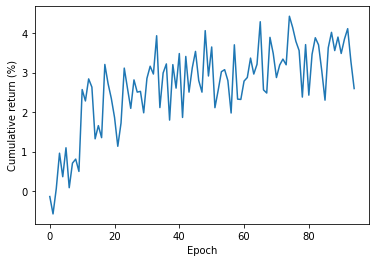

In [215]:
stl5 = StrategyLearner4(feature_list=technicals, num_shares=num_shares, min_epoch=20, verbose=True, num_actions=3)
stl5.add_evidence(start_val=start_val, start_date=start_date_train, end_date=end_date_train)

Performances during training period for CME
Date Range: 2021-07-01 00:00:00 to 2021-09-30 00:00:00
Sharpe Ratio of Portfolio: 2.5587
Sharpe Ratio of Benchmark : -2.2436

Cumulative Return of Portfolio: 98.01%
Cumulative Return of Benchmark : -21.29%

Standard Deviation of Portfolio: 0.0926
Standard Deviation of Benchmark : 0.0247

Average Daily Return of Portfolio: 1.4929
Average Daily Return of Benchmark : -0.349

Final Portfolio Value: 19716
Final Benchmark Value: 7837


/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


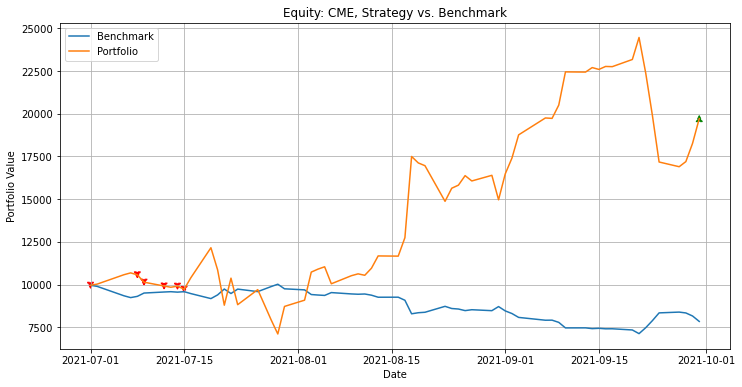

In [216]:
with open('stl_4_02_95.pkl', 'wb') as output:
    pickle.dump(stl4, output)

Performances during training period for CME
Date Range: 2021-07-01 00:00:00 to 2021-09-30 00:00:00
Sharpe Ratio of Portfolio: 2.4716
Sharpe Ratio of Benchmark : -2.2436

Cumulative Return of Portfolio: 94.53%
Cumulative Return of Benchmark : -21.29%

Standard Deviation of Portfolio: 0.0959
Standard Deviation of Benchmark : 0.0247

Average Daily Return of Portfolio: 1.4924
Average Daily Return of Benchmark : -0.349

Final Portfolio Value: 19370
Final Benchmark Value: 7837


/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


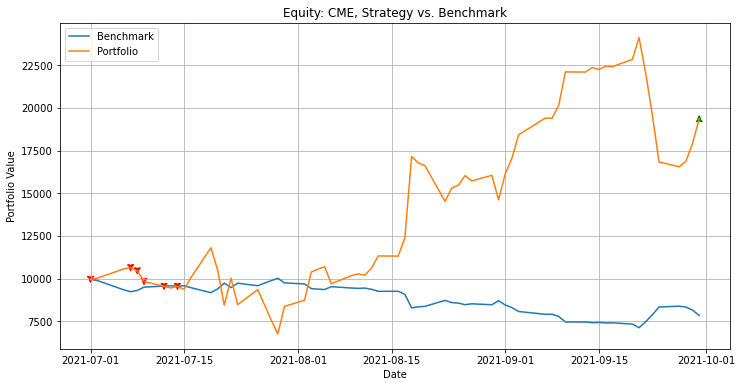

In [251]:
    
# start_date = dt.datetime(2021, 7, 1)
# end_date = dt.datetime(2021, 9, 30)

start_date = dt.datetime(2021, 7, 1)
end_date = dt.datetime(2021, 9, 30)
commission = 0.002
symbol = Financials[20]
fig_name = "../Figure/CME_S5_in.png"

test_analysis(stl5, symbol, start_date, end_date, start_val, commission, fig_name =fig_name)

/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


1 -1.1166502669542921
2 0.411857842970464
3 -0.2393176517925456
4 0.11691215432023262
5 1.6671017294964745
6 0.4117262745636052
7 1.2891031382514044
8 1.5030854964853564
9 1.8700700022092378
10 1.323415772242952
11 1.6715705055294112
12 2.006062168043698
13 0.9877353427685225
14 1.0422627597664282
15 1.9755077941122896
16 2.385777781117211
17 1.5582529743120264
18 2.0348076677536966
19 2.8355503959642827
20 1.9753603698070155
21 2.9352969993614026
22 2.461086164971388
23 3.185370153186435
24 1.1654901368210138
25 1.656954489283605
26 2.5948040440612163
27 1.975962452560773
28 3.1934606029772934
29 2.5768168129587514
30 2.9242315155090646
31 1.494413362452418
32 2.263283666130191
33 1.7675151540543914
34 3.1091369451863233
35 2.9949928444165494
36 2.2971976342426257
37 2.301914234944056
38 3.169462434020084
39 2.8366654431691063
40 3.2960303330911853
41 2.8002429457499733
42 2.327111343906143
43 2.570703923269069
44 3.3047239950509333
45 3.0937521745253007
46 3.715903268135071
47 2.9373

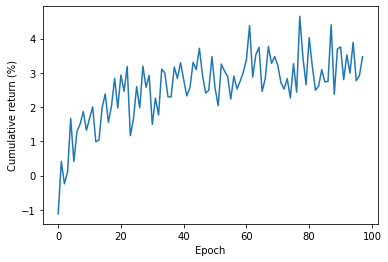

In [252]:
stl6 = StrategyLearner4(feature_list=technicals, num_shares=num_shares, min_epoch=20, verbose=True, num_actions=3)
stl6.add_evidence(start_val=start_val, start_date=start_date_train, end_date=end_date_train)

# Test all symbol

In [8]:
import marketsim
importlib.reload(marketsim)
from marketsim import market_simulator
import warnings

In [9]:
cat = ["ConsumerStaples", "InfoTech", "Financials", "HealthCare"]

In [78]:
start_date = dt.datetime(2021, 10, 1)
end_date = dt.datetime(2021, 12, 31)
commission = 0.002
start_val = 10000
num_shares = 100

all_result = {}
warnings.filterwarnings("error")
for i in cat:
    result = {}
    for symbol in globals()[i]:
        try:
            result[symbol] = test_analysis(stl, symbol, start_date, end_date, start_val, commission, verbose=False)
        except RuntimeWarning as e:
            print(f"Warning {symbol}: {e}")
        except IndexError as e:
            print(f"Error {symbol}: {e}")

    result = pd.DataFrame.from_dict(result, orient='index', columns=["sharpe_ratio", "sharpe_ratio_bm", "cum_ret", "cum_ret_bm", "std_daily_ret", "std_daily_ret_bm", "avg_daily_ret", "avg_daily_ret_bm", "portvals", "portvals_bm"])
    all_result[i] = result.mean(axis=0)

all_result = pd.DataFrame.from_dict(all_result)
warnings.filterwarnings("default")

Error ACN: iloc cannot enlarge its target object
Error CSCO: iloc cannot enlarge its target object
Error TEL: iloc cannot enlarge its target object
Error CB: iloc cannot enlarge its target object
Error WTW: iloc cannot enlarge its target object
Error OGN: iloc cannot enlarge its target object
Error VTRS: iloc cannot enlarge its target object


In [44]:
all_result.to_csv("in_sample_result.csv")

In [48]:
all_result.to_csv("out_sample_result2m.csv")

In [27]:
data_full = stl4.datafull.copy()
data_full["Sector"] = data_full["Symbol"].apply(lambda x: symbol_dict[x])

In [39]:
data_full.groupby("Sector")["Returns"].skew()

Sector
ConsumerStaples   -0.159443
Financials        -0.234585
HealthCare        -2.399534
InfoTech          -4.745328
Name: Returns, dtype: float64

In [41]:
summ = data_full.groupby("Sector")["Returns"].describe()
summ["skew"] = data_full.groupby("Sector")["Returns"].skew()
summ["kurt"] = data_full.groupby("Sector")["Returns"].apply(pd.Series.kurt)
summ.T.to_csv("sector_summary.csv")

In [15]:
from matplotlib import pyplot as plt
from statsmodels import api as sm

/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
/home1/zydong/miniconda3/envs/anaconda/lib/python3.9/site-packages/statsmodels/graphics/gofplots.py:

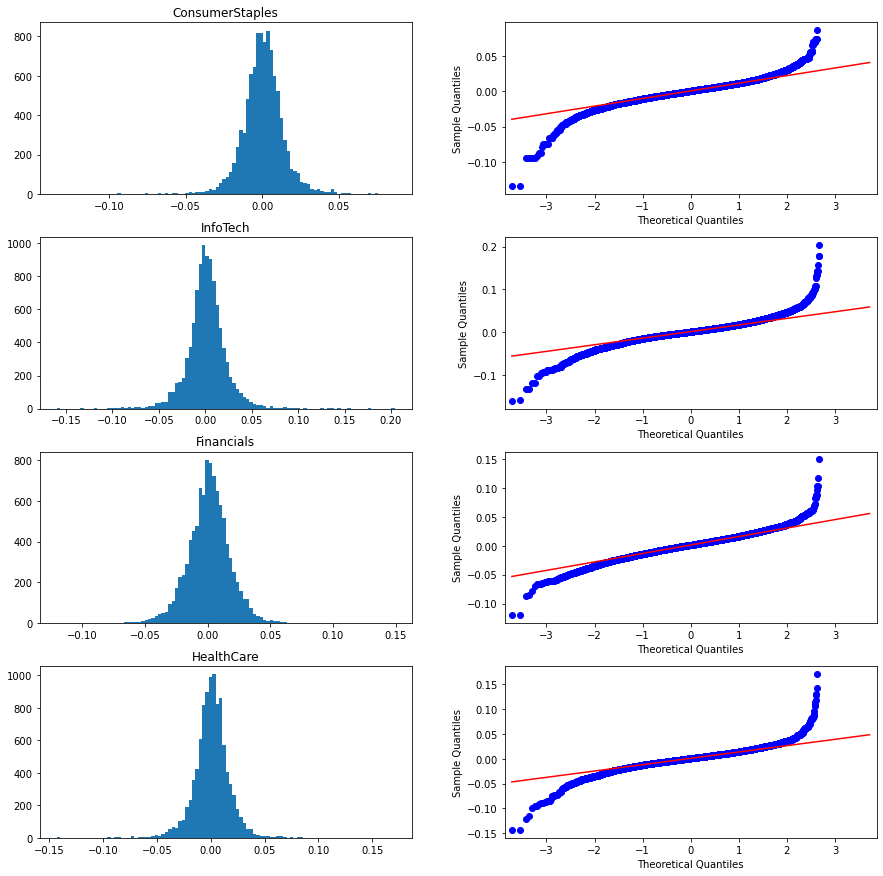

In [17]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
# Set margin of subplots
fig.subplots_adjust(hspace=.25, wspace=.25)
# plt.tight_layout()
for i in range(len(cat)):
    returns = data_full.query(f"Sector == '{cat[i]}'")["Returns"]
    residuals = np.random.choice(returns, size=10000)
    axs[i, 0].hist(residuals, bins=100)
    axs[i, 0].set_title(cat[i])
    sm.qqplot(residuals, line='q', ax=axs[i, 1])

fig.savefig("plots.png")

In [26]:
np.savetxt("Q.txt", stl_t.q_learner.Q)